## Proyecto final BOOTCAMP IRONHACK
###### Estrategias de e-COMERCE

COMPANY = GYMSHARK

### PASO 6. TESTEOS DE HIPOTESIS
- website : https://eu.gymshark.com/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import f_oneway


In [4]:
# Importo el CSV de GYMSHARK SALES CLEAN resultante del fake
sales_gymshark = pd.read_csv('sales_gymshark_clean2.csv')
sales_gymshark.head()

,InvoiceNo,StockCode,Description,Size,Quantity,InvoiceDate,CustomerID,Country,Rating,Colour,Price,Category,Day,Month,Year,Hour,DayOfWeek
0,282618,76203V,Apex T-Shirt,L,1,2023-11-22 11:30:00,17849,Australia,4.5,River Stone Grey/Drift Grey,34.04,Men,22,11,2023,11:30:00,2
1,178838,43343R,Pursuit Duffle Bag,M,3,2023-12-25 11:54:00,90379,USA,4.6,Black/White,91.96,Women,25,12,2023,11:54:00,0
2,317707,11168Y,Everyday Mini Backpack,L,1,2023-03-30 09:05:00,73114,UK,0.0,Dusk Green,31.50,Women,30,3,2023,09:05:00,3
3,998032,21561X,No Show Performance Socks,S,6,2023-02-21 15:44:00,21105,USA,5.0,Plum Pink Marl,9.90,Men,21,2,2023,15:44:00,1
4,986803,64146P,GS X Libby Shorts,L,1,2023-03-12 09:29:00,23910,USA,4.2,Camo Brown,44.00,Men,12,3,2023,09:29:00,6


## Hipótesis sobre el comportamiento de compra de los clientes:

### Hipótesis 1: Los clientes tienden a comprar más productos durante ciertos días de la semana o momentos del año.

- Desarrollo: Para probar esta hipótesis, podrías analizar tus datos y calcular el promedio de ventas diarias durante diferentes días de la semana y meses del año. Luego, podrías comparar estos promedios para identificar cualquier patrón de compra significativo en función del día de la semana o del momento del año.

- Método: Utiliza técnicas estadísticas como análisis de varianza (ANOVA) o pruebas t para comparar los promedios de ventas entre diferentes días de la semana o meses del año.


Para realizar el análisis estadístico, puedes seguir estos pasos:

Análisis de ventas por día de la semana:

1- Calculamos el promedio de ventas para cada día de la semana.
2.- Utilizamos análisis de varianza (ANOVA) para comparar los promedios de ventas entre los diferentes días de la semana.
 - H0: La hipótesis nula sería que no hay diferencia significativa en las ventas entre los días de la semana
 - H1: hipótesis alternativa sería que al menos un día de la semana tiene un promedio de ventas diferente.


Si el valor p resultante del ANOVA es menor que un umbral de significancia (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay al menos un día de la semana con un promedio de ventas significativamente diferente.


Análisis de ventas por mes:

1- Calculamos el promedio de ventas para cada mes.
2.- Utilizamos ANOVA o pruebas t para comparar los promedios de ventas entre los diferentes meses.
 - H0:
 - H1

Evaluamos el valor p resultante para determinar si hay diferencias significativas en las ventas entre los meses del año.



In [4]:
sales_gymshark['InvoiceDate'] = pd.to_datetime(sales_gymshark['InvoiceDate'])

# Agrupar por día de la semana
sales_gymshark['DayOfWeek'] = sales_gymshark['InvoiceDate'].dt.dayofweek
sales_by_dayofweek = sales_gymshark.groupby('DayOfWeek')['Quantity'].mean()

# ANOVA para comparar los promedios de ventas entre diferentes días de la semana
f_statistic, p_value = f_oneway(*[group for name, group in sales_gymshark.groupby('DayOfWeek')['Quantity']])
print("ANOVA para días de la semana:")
print("Estadística F:", f_statistic)
print("Valor p:", p_value)

# Agrupar por mes
sales_gymshark['Month'] = sales_gymshark['InvoiceDate'].dt.month
sales_by_month = sales_gymshark.groupby('Month')['Quantity'].mean()

# ANOVA para comparar los promedios de ventas entre diferentes meses del año
f_statistic, p_value = f_oneway(*[group for name, group in sales_gymshark.groupby('Month')['Quantity']])
print("\nANOVA para meses del año:")
print("Estadística F:", f_statistic)
print("Valor p:", p_value)


ANOVA para días de la semana:
Estadística F: 0.7366949697324469
Valor p: 0.6200120477587294

ANOVA para meses del año:
Estadística F: 0.534835403926063
Valor p: 0.881037374514923


##### Interpretación de los resultados:

Los resultados de las pruebas ANOVA indican lo siguiente:

Para la prueba ANOVA realizada para los días de la semana, la estadística F es aproximadamente 0.737 y el valor p es aproximadamente 0.620. Dado que el valor p es mayor que el nivel de significancia típico de 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay una diferencia significativa en las ventas entre los diferentes días de la semana.

Para la prueba ANOVA realizada para los meses del año, la estadística F es aproximadamente 0.535 y el valor p es aproximadamente 0.881. De manera similar al caso anterior, el valor p es mayor que el nivel de significancia de 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay una diferencia significativa en las ventas entre los diferentes meses del año.

En resumen, según estos resultados, no parece haber un patrón significativo en las ventas en función del día de la semana o del mes del año.

### Hipótesis 2: Existe una correlación entre el precio de los productos y la cantidad de unidades vendidas.

- Desarrollo: Para probar esta hipótesis, podrías graficar el precio de los productos en el eje X y la cantidad de unidades vendidas en el eje Y y analizar la relación entre estas dos variables. También podrías calcular el coeficiente de correlación para determinar la fuerza y la dirección de la relación entre el precio y las ventas.
- Método: Utiliza análisis de regresión para modelar la relación entre el precio y las ventas, y calcula el coeficiente de correlación para cuantificar la fuerza de la relación.


Pasos:

1.- Preparación de los datos

2.- Análisis gráfico: el precio de los productos en el eje X y la cantidad de unidades vendidas en el eje Y para visualizar la relación entre estas dos variables.

3.- Análisis de regresión: Con el análisis de regresión para modelar la relación entre el precio y las ventas. 

4.- Cálculo del coeficiente de correlación: el coeficiente de correlación entre el precio y las ventas para cuantificar la fuerza y la dirección de la relación entre estas dos variables. Esto dará una medida numérica de la relación lineal entre el precio y las ventas.


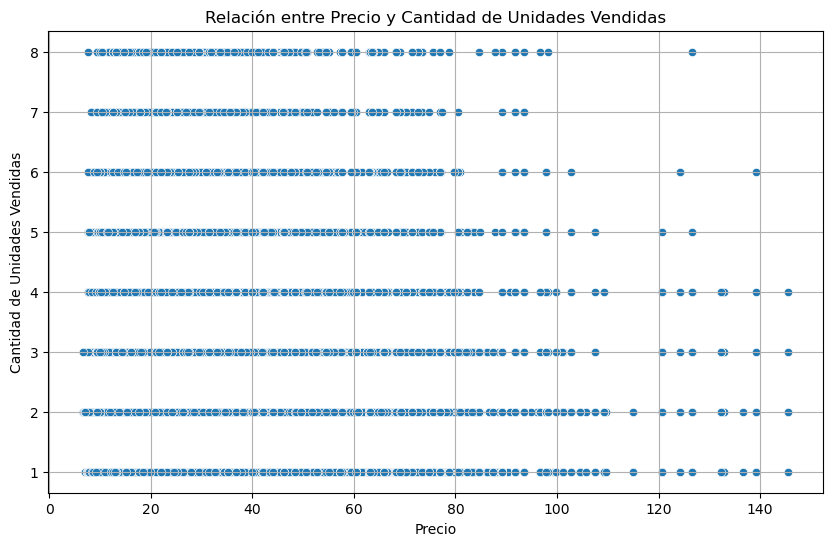

Coeficiente de la pendiente (pendiente): -0.0005244284754170474
Intercepto: 2.109645033801318
Coeficiente de correlación: -0.007074626148892453


In [5]:
# Análisis gráfico: Graficar el precio vs la cantidad de unidades vendidas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity', data=sales_gymshark)
plt.title('Relación entre Precio y Cantidad de Unidades Vendidas')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Unidades Vendidas')
plt.grid(True)
plt.show()

# Análisis de regresión: Ajustar un modelo de regresión lineal
from sklearn.linear_model import LinearRegression

X = sales_gymshark[['Price']]
y = sales_gymshark['Quantity']

# Instanciar y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Imprimir los coeficientes de la regresión
print('Coeficiente de la pendiente (pendiente):', model.coef_[0])
print('Intercepto:', model.intercept_)

# Cálculo del coeficiente de correlación
correlation_coefficient = sales_gymshark['Price'].corr(sales_gymshark['Quantity'])
print('Coeficiente de correlación:', correlation_coefficient)


##### Interpretación de resultados: 

el coeficiente de correlación es muy cercano a cero, lo que sugiere que no hay una correlación lineal fuerte entre el precio de los productos y la cantidad de unidades vendidas

In [6]:
sales_gymshark[sales_gymshark['InvoiceNo'] == 670503]

,InvoiceNo,StockCode,Description,Size,Quantity,InvoiceDate,CustomerID,Country,Rating,Colour,Price,Category,Day,Month,Year,Hour,DayOfWeek
211,670503,48459S,Adapt Fleck Seamless Long Sleeve Crop Top,S,1,2023-11-01 11:21:00,7031,USA,3.8,Black,10.56,Women,1,11,2023,11:21:00,2
